# Practice notebook for univariate analysis using NHANES data

This notebook will give you the opportunity to perform some univariate analyses on your own using the NHANES.  These analyses are similar to what was done in the week 2 NHANES case study notebook.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

da = pd.read_csv("nhanes_2015_2016.csv")

## Question 1

Relabel the marital status variable [DMDMARTL](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDMARTL) to have brief but informative character labels.  Then construct a frequency table of these values for all people, then for women only, and for men only.  Then construct these three frequency tables using only people whose age is between 30 and 40.

In [29]:
da = pd.read_csv("nhanes_2015_2016.csv")
da['DMDMARTL'] = da['DMDMARTL'].replace({1:"Married",2:"Widowed",3:"Divorced",4:"Separated", 5:"Never married", 6:"Living with partner",77:"Refused",99:"Don't know"})
print("Frequency count for all people")
print(da['DMDMARTL'].value_counts()/(da['DMDMARTL'].value_counts().sum()),"\n")
da["RIAGENDR"] = da["RIAGENDR"].replace({1:"Male",2:"Female"})
male_da = da[da["RIAGENDR"] == "Male"]
female_da = da[da["RIAGENDR"] == "Female"]

print("Frequency count for men")
print(male_da['DMDMARTL'].value_counts()/(male_da['DMDMARTL'].value_counts().sum()),"\n")
print("Frequency count for women")
print(female_da['DMDMARTL'].value_counts()/(female_da['DMDMARTL'].value_counts().sum()),"\n")
print("For people whose age is between 30 and 40:","\n")
print("Frequency count for all people")
new_age_group = da.where((da['RIDAGEYR'] >= 30) & (da['RIDAGEYR'] <= 40)).dropna()
print(new_age_group['DMDMARTL'].value_counts()/(new_age_group['DMDMARTL'].value_counts().sum()),"\n")
print("Frequency count for men")
male_da = new_age_group[new_age_group["RIAGENDR"] == "Male"]
female_da = new_age_group[new_age_group["RIAGENDR"] == "Female"]
print(male_da['DMDMARTL'].value_counts()/(male_da['DMDMARTL'].value_counts().sum()),"\n")
print("Frequency count for women")
print(female_da['DMDMARTL'].value_counts()/(female_da['DMDMARTL'].value_counts().sum()),"\n")

Frequency count for all people
Married                0.507855
Never married          0.183412
Divorced               0.105773
Living with partner    0.096273
Widowed                0.072342
Separated              0.033979
Refused                0.000365
Name: DMDMARTL, dtype: float64 

Frequency count for men
Married                0.562881
Never married          0.184451
Living with partner    0.100991
Divorced               0.087271
Widowed                0.038110
Separated              0.025915
Refused                0.000381
Name: DMDMARTL, dtype: float64 

Frequency count for women
Married                0.457193
Never married          0.182456
Divorced               0.122807
Widowed                0.103860
Living with partner    0.091930
Separated              0.041404
Refused                0.000351
Name: DMDMARTL, dtype: float64 

For people whose age is between 30 and 40: 

Frequency count for all people
Married                0.613636
Never married          0.204545
Divorced

__Q1a.__ Briefly comment on some of the differences that you observe between the distribution of marital status between women and men, for people of all ages.

__Q1b.__ Briefly comment on the differences that you observe between the distribution of marital status states for women between the overall population, and for women between the ages of 30 and 40.

__Q1c.__ Repeat part b for the men.

## Question 2

Restricting to the female population, stratify the subjects into age bands no wider than ten years, and construct the distribution of marital status within each age band.  Within each age band, present the distribution in terms of proportions that must sum to 1.

In [55]:
da = pd.read_csv("nhanes_2015_2016.csv")
da['DMDMARTL'] = da['DMDMARTL'].replace({1:"Married",2:"Widowed",3:"Divorced",4:"Separated", 5:"Never married", 6:"Living with partner",77:"Refused",99:"Don't know"})
da["RIAGENDR"] = da["RIAGENDR"].replace({1:"Male",2:"Female"})
df = da[da["RIAGENDR"] == "Female"]
df['age_grp'] = pd.cut(df.RIDAGEYR,[18,20,30,40,50,60,70,80])
marital_status= df.groupby('age_grp')['DMDMARTL'].value_counts().unstack()
marital_status["sum"] = marital_status.sum(axis = 1)
marital_status = marital_status.div(marital_status["sum"] , axis = 0)
marital_status.drop(['sum'], axis =1, inplace = True)
marital_status

<ipython-input-55-eb47ad391317>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_grp'] = pd.cut(df.RIDAGEYR,[18,20,30,40,50,60,70,80])


DMDMARTL,Divorced,Living with partner,Married,Never married,Refused,Separated,Widowed
age_grp,,,,,,,
"(18, 20]",NaN,0.205128,0.025641,0.769231,NaN,NaN,NaN
"(20, 30]",0.021401,0.206226,0.305447,0.445525,NaN,0.021401,NaN
"(30, 40]",0.090717,0.120253,0.544304,0.204641,NaN,0.035865,0.004219
"(40, 50]",0.137450,0.073705,0.573705,0.125498,NaN,0.065737,0.023904
"(50, 60]",0.176596,0.068085,0.546809,0.089362,0.002128,0.057447,0.059574
"(60, 70]",0.192744,0.043084,0.480726,0.086168,NaN,0.049887,0.147392
"(70, 80]",0.143902,0.007317,0.317073,0.051220,NaN,0.019512,0.460976


__Q2a.__ Comment on the trends that you see in this series of marginal distributions.

__Q2b.__ Repeat the construction for males.

In [126]:
da = pd.read_csv("nhanes_2015_2016.csv")
da['DMDMARTL'] = da['DMDMARTL'].replace({1:"Married",2:"Widowed",3:"Divorced",4:"Separated", 5:"Never married", 6:"Living with partner",77:"Refused",99:"Don't know"})
da["RIAGENDR"] = da["RIAGENDR"].replace({1:"Male",2:"Female"})
df = da[da["RIAGENDR"] == "Male"]
df['age_grp'] = pd.cut(df.RIDAGEYR,[18,20,30,40,50,60,70,80])
marital_status= df.groupby('age_grp')['DMDMARTL'].value_counts().unstack()
marital_status["sum"] = marital_status.sum(axis = 1)
marital_status = marital_status.div(marital_status["sum"] , axis = 0)
marital_status.drop(['sum'], axis =1, inplace = True)
marital_status

<ipython-input-126-82f4c23a6cb3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_grp'] = pd.cut(df.RIDAGEYR,[18,20,30,40,50,60,70,80])


DMDMARTL,Divorced,Living with partner,Married,Never married,Refused,Separated,Widowed
age_grp,,,,,,,
"(18, 20]",NaN,0.075000,0.025000,0.900000,NaN,NaN,NaN
"(20, 30]",0.004630,0.212963,0.238426,0.523148,NaN,0.016204,0.004630
"(30, 40]",0.052402,0.157205,0.563319,0.194323,0.002183,0.026201,0.004367
"(40, 50]",0.084788,0.082294,0.703242,0.097257,NaN,0.027431,0.004988
"(50, 60]",0.125551,0.074890,0.651982,0.103524,NaN,0.022026,0.022026
"(60, 70]",0.125858,0.050343,0.665904,0.086957,NaN,0.032037,0.038902
"(70, 80]",0.141791,0.022388,0.611940,0.022388,NaN,0.034826,0.166667


__Q2c.__ Comment on any notable differences that you see when comparing these results for females and for males.

## Question 3

Construct a histogram of the distribution of heights using the BMXHT variable in the NHANES sample.

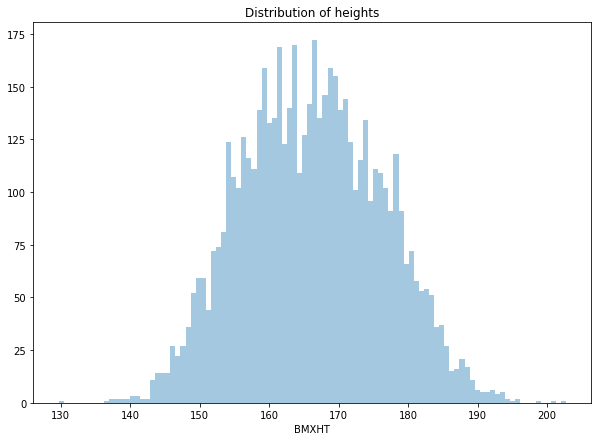

In [129]:
da = pd.read_csv("nhanes_2015_2016.csv")
da['DMDMARTL'] = da['DMDMARTL'].replace({1:"Married",2:"Widowed",3:"Divorced",4:"Separated", 5:"Never married", 6:"Living with partner",77:"Refused",99:"Don't know"})
da["RIAGENDR"] = da["RIAGENDR"].replace({1:"Male",2:"Female"})
plt.figure(figsize = (10,7))
sns.distplot(da['BMXHT'], kde = False, bins = 100).set_title('Distribution of heights')
plt.show()

__Q3a.__ Use the `bins` argument to [distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) to produce histograms with different numbers of bins.  Assess whether the default value for this argument gives a meaningful result, and comment on what happens as the number of bins grows excessively large or excessively small. 

__Q3b.__ Make separate histograms for the heights of women and men, then make a side-by-side boxplot showing the heights of women and men.

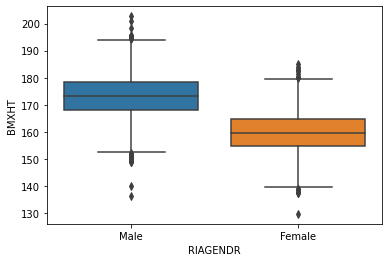

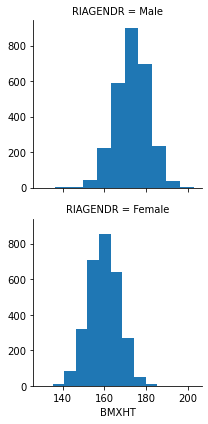

In [62]:
sns.boxplot(x = da["RIAGENDR"], y = da['BMXHT'])
g = sns.FacetGrid(da, row = 'RIAGENDR')
g =  g.map(plt.hist, 'BMXHT')
plt.show()

__Q3c.__ Comment on what features, if any are not represented clearly in the boxplots, and what features, if any, are easier to see in the boxplots than in the histograms.

## Question 4

Make a boxplot showing the distribution of within-subject differences between the first and second systolic blood pressure measurents ([BPXSY1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY1) and [BPXSY2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY2)).

/home/rishabhjain/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'within-subject differences between the first and second systolic blood pressure measurents')

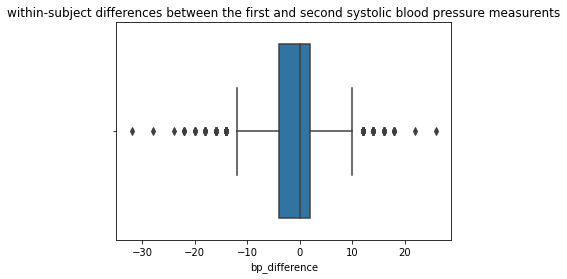

In [65]:
da = pd.read_csv("nhanes_2015_2016.csv")
da['DMDMARTL'] = da['DMDMARTL'].replace({1:"Married",2:"Widowed",3:"Divorced",4:"Separated", 5:"Never married", 6:"Living with partner",77:"Refused",99:"Don't know"})
da["RIAGENDR"] = da["RIAGENDR"].replace({1:"Male",2:"Female"})
da['bp_difference'] = da['BPXSY2'] - da['BPXSY1']
sns.boxplot(da['bp_difference']).set_title('within-subject differences between the first and second systolic blood pressure measurents')

__Q4a.__ What proportion of the subjects have a lower SBP on the second reading compared to the first?

In [71]:
da['lower_sbp'] = da['bp_difference'] < 0
da['lower_sbp'].sum()/da['lower_sbp'].size

0.42946817785527464

__Q4b.__ Make side-by-side boxplots of the two systolic blood pressure variables.

AttributeError: 'Text' object has no attribute 'set_ylabel'

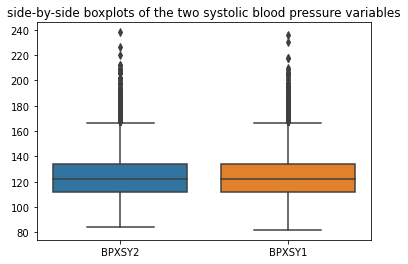

In [79]:

bp = sns.boxplot(data = da[['BPXSY2','BPXSY1']]).set_title('side-by-side boxplots of the two systolic blood pressure variables')
_ = bp.set_ylabel("Blood pressure in mm/Hg")


__Q4c.__ Comment on the variation within either the first or second systolic blood pressure measurements, and the variation in the within-subject differences between the first and second systolic blood pressure measurements.

## Question 5

Construct a frequency table of household sizes for people within each educational attainment category (the relevant variable is [DMDEDUC2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDEDUC2)).  Convert the frequencies to proportions.

In [97]:
da = pd.read_csv("nhanes_2015_2016.csv")
household_sizes = da.groupby('DMDEDUC2')['DMDHHSIZ'].value_counts().unstack()
household_sizes['sum'] = household_sizes.sum(axis = 1)
household_sizes = household_sizes.div(household_sizes["sum"] , axis = 0)
household_sizes.drop(["sum"], axis = 1, inplace = True)
household_sizes

DMDHHSIZ,1,2,3,4,5,6,7
DMDEDUC2,,,,,,,
1.0,72.0,147.0,96.0,87.0,97.0,71.0,85.0
2.0,75.0,143.0,105.0,98.0,94.0,73.0,55.0
3.0,181.0,321.0,203.0,192.0,130.0,78.0,81.0
4.0,245.0,436.0,313.0,274.0,198.0,82.0,73.0
5.0,195.0,475.0,265.0,226.0,130.0,40.0,35.0
9.0,NaN,2.0,NaN,NaN,1.0,NaN,NaN


__Q5a.__ Comment on any major differences among the distributions.

__Q5b.__ Restrict the sample to people between 30 and 40 years of age.  Then calculate the median household size for women and men within each level of educational attainment.

In [98]:
da = da.where((da['RIDAGEYR'] >= 30) & (da['RIDAGEYR'] <= 40)).dropna()
da.groupby('DMDEDUC2')['DMDHHSIZ'].median(numeric_only = True)

DMDEDUC2
1.0    3.0
2.0    4.0
3.0    5.5
4.0    4.0
5.0    3.5
Name: DMDHHSIZ, dtype: float64

## Question 6

The participants can be clustered into "maked variance units" (MVU) based on every combination of the variables [SDMVSTRA](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#SDMVSTRA) and [SDMVPSU](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#SDMVPSU).  Calculate the mean age ([RIDAGEYR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDAGEYR)), height ([BMXHT](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXHT)), and BMI ([BMXBMI](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXBMI)) for each gender ([RIAGENDR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIAGENDR)), within each MVU, and report the ratio between the largest and smallest mean (e.g. for height) across the MVUs.

In [112]:
da = pd.read_csv("nhanes_2015_2016.csv")
age = da.groupby(['SDMVSTRA','SDMVPSU','RIAGENDR'])['RIDAGEYR'].mean().unstack()
print(age)
print("Max: ",age.to_numpy().max(),"Min: ",age.to_numpy().min(),'\n')
height = da.groupby(['SDMVSTRA','SDMVPSU','RIAGENDR'])['BMXHT'].mean().unstack()
print(height)
print("Max: ",height.to_numpy().max(),"Min: ",height.to_numpy().min(),'\n')
BMI = da.groupby(['SDMVSTRA','SDMVPSU','RIAGENDR'])['BMXBMI'].mean().unstack()
print(BMI)
print("Max: ",BMI.to_numpy().max(),"Min: ",BMI.to_numpy().min(),'\n')

RIAGENDR                  1          2
SDMVSTRA SDMVPSU                      
119      1        47.861111  47.663265
         2        54.363636  52.987952
120      1        43.130000  43.636364
         2        45.219178  43.736111
121      1        46.750000  44.397959
         2        42.063158  44.376344
122      1        44.653061  42.897436
         2        44.320000  47.333333
123      1        47.829787  44.841121
         2        52.126582  46.457447
124      1        50.750000  51.664000
         2        48.245614  42.541667
125      1        55.165289  50.900901
         2        49.705882  51.660000
126      1        48.416667  46.229167
         2        48.666667  47.205882
127      1        53.137931  49.694444
         2        54.070588  51.486239
128      1        53.673267  55.638462
         2        45.822785  45.589744
129      1        43.922222  45.329787
         2        45.775510  43.500000
130      1        50.516854  47.810526
         2        50.5353

__Q6a.__ Comment on the extent to which mean age, height, and BMI vary among the MVUs.

__Q6b.__ Calculate the inter-quartile range (IQR) for age, height, and BMI for each gender and each MVU.  Report the ratio between the largest and smalles IQR across the MVUs.

In [125]:
da = pd.read_csv("nhanes_2015_2016.csv")
da["RIAGENDR"] = da["RIAGENDR"].replace({1:"Male",2:"Female"})
age_75 = da.groupby(['SDMVSTRA','SDMVPSU','RIAGENDR'])['RIDAGEYR'].quantile(q=0.75).unstack()
age_25 = da.groupby(['SDMVSTRA','SDMVPSU','RIAGENDR'])['RIDAGEYR'].quantile(q=0.25).unstack()
height_75 = da.groupby(['SDMVSTRA','SDMVPSU','RIAGENDR'])['BMXHT'].quantile(q=0.75).unstack()
height_25 = da.groupby(['SDMVSTRA','SDMVPSU','RIAGENDR'])['BMXHT'].quantile(q=0.25).unstack()
bmi_75 = da.groupby(['SDMVSTRA','SDMVPSU','RIAGENDR'])['BMXBMI'].quantile(q=0.75).unstack()
bmi_25 = da.groupby(['SDMVSTRA','SDMVPSU','RIAGENDR'])['BMXBMI'].quantile(q=0.25).unstack()
print(age_75.subtract(age_25))
age_IQR = age_75.subtract(age_25)
print("Max: ",age_IQR.to_numpy().max(),"Min: ",age_IQR.to_numpy().min(),'\n')
print("\n")
print(height_75.subtract(height_25))
height_IQR = height_75.subtract(height_25)
print("Max: ",height_IQR.to_numpy().max(),"Min: ",height_IQR.to_numpy().min(),'\n')
print("\n")
print(bmi_75.subtract(bmi_25))
bmi_IQR = bmi_75.subtract(bmi_25)
print("Max: ",bmi_IQR.to_numpy().max(),"Min: ",bmi_IQR.to_numpy().min(),'\n')

RIAGENDR          Female   Male
SDMVSTRA SDMVPSU               
119      1         31.25  29.75
         2         33.50  29.00
120      1         26.50  23.75
         2         25.75  26.00
121      1         26.25  34.50
         2         26.00  25.50
122      1         24.00  29.50
         2         25.00  30.00
123      1         30.50  28.25
         2         34.50  31.50
124      1         27.00  32.00
         2         23.50  31.00
125      1         31.00  29.00
         2         32.25  33.50
126      1         30.25  36.25
         2         31.75  34.00
127      1         27.25  30.00
         2         30.00  28.00
128      1         28.00  33.00
         2         22.00  25.50
129      1         24.75  20.75
         2         26.25  30.75
130      1         35.50  36.00
         2         30.25  28.50
131      1         35.75  36.00
         2         24.00  28.00
132      1         30.00  21.25
         2         33.00  38.00
133      1         34.00  33.00
        

__Q6c.__ Comment on the extent to which the IQR for age, height, and BMI vary among the MVUs.